#Import data

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt

In [2]:
ksi = pd.read_csv('KSI.csv')

#check overall and each variable

In [ ]:
ksi.shape

(16860, 57)

In [ ]:
ksi.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Motorcycle Driver,45 to 49,Fatal,<Null>,East,Motorcycle,Turning Right,Disobeyed Traffic Control,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Other,"Ability Impaired, Alcohol",<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [ ]:
df = ksi['ACCLASS'].value_counts()
print(df)
print(type(df))

Non-Fatal Injury        14561
Fatal                    2297
Property Damage Only        2
Name: ACCLASS, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(pd.crosstab(ksi['ACCLASS'],ksi['FATAL_NO']))

In [ ]:
print(pd.crosstab(ksi['ACCLOC'],ksi['TRAFFCTL']))

In [ ]:
print(pd.crosstab(ksi['PEDTYPE'],ksi['PEDACT']))

In [ ]:
print(pd.crosstab(ksi['PEDTYPE'],ksi['PEDCOND']))

In [ ]:
print(pd.crosstab(ksi['AUTOMOBILE'],ksi['PEDESTRIAN']))

In [ ]:
print(pd.crosstab(ksi['VEHTYPE'],ksi['EMERG_VEH']))

In [ ]:
print(pd.crosstab(ksi['SPEEDING'],ksi['AG_DRIV']))

In [ ]:
print(pd.crosstab(ksi['REDLIGHT'],ksi['AG_DRIV']))

In [ ]:
print(pd.crosstab(ksi['ALCOHOL'],ksi['AG_DRIV']))

In [ ]:
ksi.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

In [ ]:
ksi.dtypes

#Data preparation

drop unnecessary variables

handling missing values

1.   check nan




In [ ]:
ksi_replace = ksi.replace(' ', np.nan)
print(ksi_replace.isna().sum()/len(ksi_replace)*100)

no nan data

check null

In [ ]:
ksi_replace = ksi.replace('<Null>', np.nan)
print(ksi_replace.isna().sum()/len(ksi_replace)*100)

X                   0.000000
Y                   0.000000
INDEX_              0.000000
ACCNUM              0.000000
YEAR                0.000000
DATE                0.000000
TIME                0.000000
HOUR                0.000000
STREET1             0.000000
STREET2             8.956109
OFFSET             83.712930
ROAD_CLASS          2.947805
DISTRICT            0.836299
WARDNUM             1.162515
DIVISION            1.162515
LATITUDE            0.000000
LONGITUDE           0.000000
LOCCOORD            0.622776
ACCLOC             32.325030
TRAFFCTL            0.172005
VISIBILITY          0.106762
LIGHT               0.000000
RDSFCOND            0.136418
ACCLASS             0.000000
IMPACTYPE           0.023725
INVTYPE             0.071174
INVAGE              0.000000
INJURY              9.561091
FATAL_NO           95.771056
INITDIR            29.027284
VEHTYPE            16.684460
MANOEUVER          42.900356
DRIVACT            49.810202
DRIVCOND           49.798339
PEDTYPE       

#Exploration

The top 5 neibourhood where accidents happened

In [ ]:
df = ksi['HOOD_ID'].value_counts()
print(df)
print(type(df))

In [22]:
neighbour = ksi['NEIGHBOURHOOD']

In [ ]:
neighbour

In [24]:
neighbour = pd.DataFrame(neighbour, columns =['NEIGHBOURHOOD'])
neighbour

,NEIGHBOURHOOD
0,High Park North (88)
1,High Park North (88)
2,Rouge (131)
3,Rouge (131)
4,Eglinton East (138)
...,...
16855,Cliffcrest (123)
16856,Eglinton East (138)
16857,Eglinton East (138)
16858,Eglinton East (138)


In [26]:
ax = neighbour.groupby('NEIGHBOURHOOD').size() 

In [27]:
ax = ax.sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'top 5 neibourhood for all the accidents')

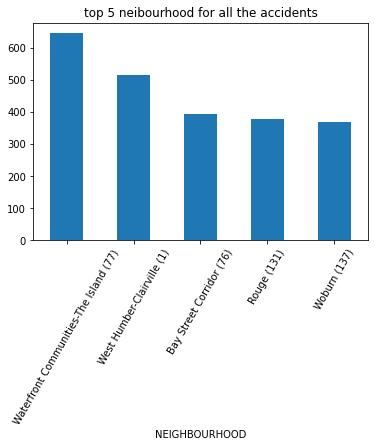

In [28]:
ax.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('top 5 neibourhood for all the accidents')

top 5 neibourhood where fatal cases happened

In [8]:
neighbour2 = (ksi[ksi['ACCLASS'] == 'Fatal'])

In [10]:
neighbour2 = pd.DataFrame(neighbour2['NEIGHBOURHOOD'], columns =['NEIGHBOURHOOD'])
neighbour2

,NEIGHBOURHOOD
0,High Park North (88)
1,High Park North (88)
2,Rouge (131)
3,Rouge (131)
4,Eglinton East (138)
...,...
16817,Waterfront Communities-The Island (77)
16818,Waterfront Communities-The Island (77)
16819,Yorkdale-Glen Park (31)
16820,Yorkdale-Glen Park (31)


In [11]:
ax2 = neighbour2.groupby('NEIGHBOURHOOD').size()
ax2.head()

NEIGHBOURHOOD
Agincourt North (129)                 22
Agincourt South-Malvern West (128)    26
Alderwood (20)                         5
Annex (95)                            15
Banbury-Don Mills (42)                24
dtype: int64

In [12]:
ax2 = ax2.sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'top 5 neibourhood for the fatal cases')

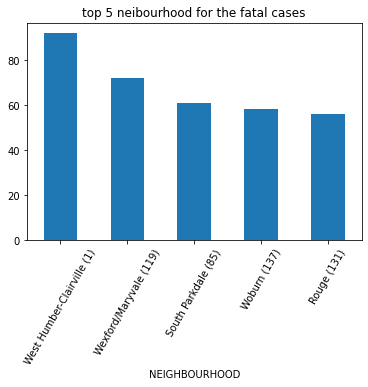

In [15]:
ax2.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('top 5 neibourhood for the fatal cases')

District for all the accidents

In [29]:
district = ksi['DISTRICT']

In [ ]:
district = pd.DataFrame(district, columns =['DISTRICT'])
district

In [31]:
ax3 = district.groupby('DISTRICT').size() 

In [32]:
ax3 = ax3.sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'top 5 district for all the accidents')

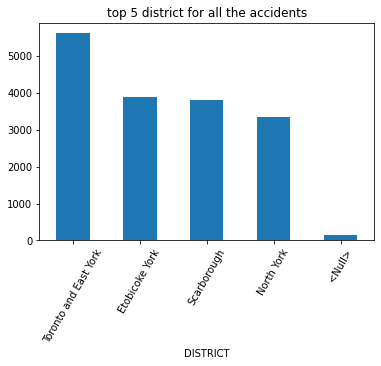

In [33]:
ax3.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('top 5 district for all the accidents')

null = 0.83%

District for the fatal cases

In [34]:
district2 = (ksi[ksi['ACCLASS'] == 'Fatal'])

In [35]:
district2 = pd.DataFrame(district2['DISTRICT'], columns =['DISTRICT'])
district2

,DISTRICT
0,Toronto and East York
1,Toronto and East York
2,Scarborough
3,Scarborough
4,Scarborough
...,...
16817,Toronto and East York
16818,Toronto and East York
16819,North York
16820,North York


In [36]:
ax4 = district2.groupby('DISTRICT').size()
ax4.head()

DISTRICT
<Null>                 2
Etobicoke York       529
North York           512
Scarborough          674
Toronto East York      3
dtype: int64

In [37]:
ax4 = ax4.sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'top 5 district for the fatal cases')

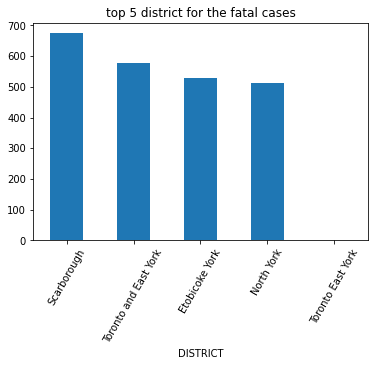

In [38]:
ax4.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('top 5 district for the fatal cases')

Location Coordinate

In [41]:
df3 = ksi['LOCCOORD'].value_counts()
print(df3)
print(type(df3))

Intersection                           11141
Mid-Block                               5598
<Null>                                   105
Exit Ramp Westbound                        5
Mid-Block (Abnormal)                       4
Exit Ramp Southbound                       3
Entrance Ramp Westbound                    2
Park, Private Property, Public Lane        2
Name: LOCCOORD, dtype: int64
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'top 5 location coordinate for the fatal cases')

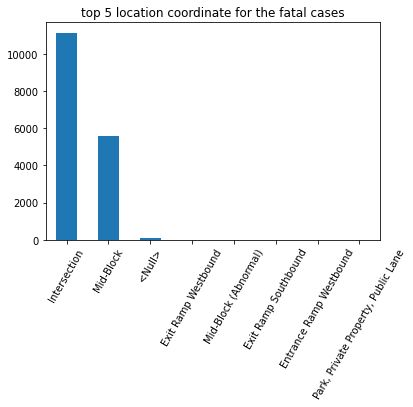

In [42]:
df3.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('top 5 location coordinate for the fatal cases')